# Baseball Fields

#### Kevin Ressler

For my metric, I looked at how many baseball fields were in each neighborhood, and whether those fields had lights. I figured it’s not just about having a lot of fields, but also making sure they can be used after dark.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [2]:
df = pd.read_csv("Data/BaseballFields.csv")
df.head(10)

,_id,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,2,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,3,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,4,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,5,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870
5,6,491692062,Bigbee,f,Emerald View Park - Bigbee Field Park,Rectangular Only,0,NaN,NaN,NaN,...,Allentown,3,18,42003180300,5,18,3,4-5,40.427849,-80.001223
6,7,332143201,Bill Stoltz,t,Arlington Park,Diamond Only,0,Skinned,210.0,250.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418624,-79.974959
7,8,800768920,Brighton Heights Field 1,f,Brighton Heights Park,Diamond Only,0,Skinned,170.0,170.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.488582,-80.033072
8,9,742572488,Brighton Heights Field 2,f,Brighton Heights Park,Diamond Only,0,Skinned,260.0,375.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.488152,-80.032783
9,10,183023484,Brighton Heights Field 3 - John Merry,f,Brighton Heights Park,Diamond Only,0,Skinned,310.0,333.0,...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.487739,-80.032533


Here I am just importing the data and displaying the first 10 entries. This shows what kinds of data is recorded for each field like the name, neighborhood and size.

Text(0.5, 1.0, 'Number of Fields in each Neighborhood')

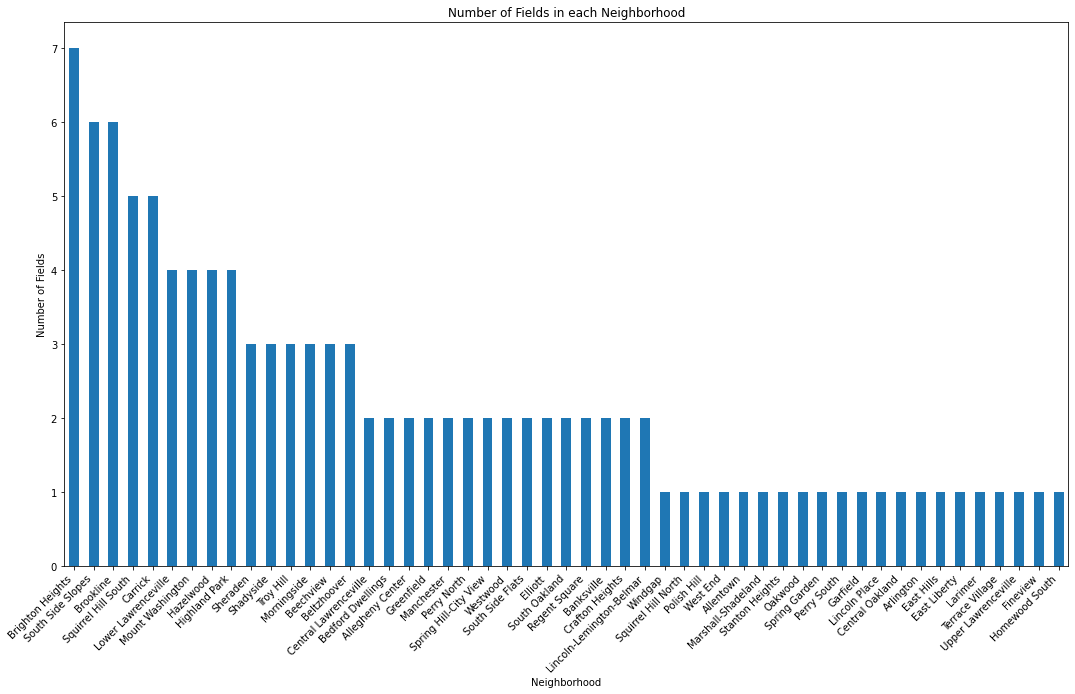

In [3]:
fields_count = df["neighborhood"].value_counts()
plt.figure(figsize=(18,10))
fields_count.plot(kind='bar')
plt.xlabel("Neighborhood")
plt.ylabel("Number of Fields")
plt.xticks(rotation = 45, ha = "right")
plt.title("Number of Fields in each Neighborhood")


Here I’m showing the number of fields per neighborhood using a bar graph. You can see that Brighton Heights has the most, with a total of seven fields.

Text(0.5, 1.0, 'Number of Fields with and without Lights')

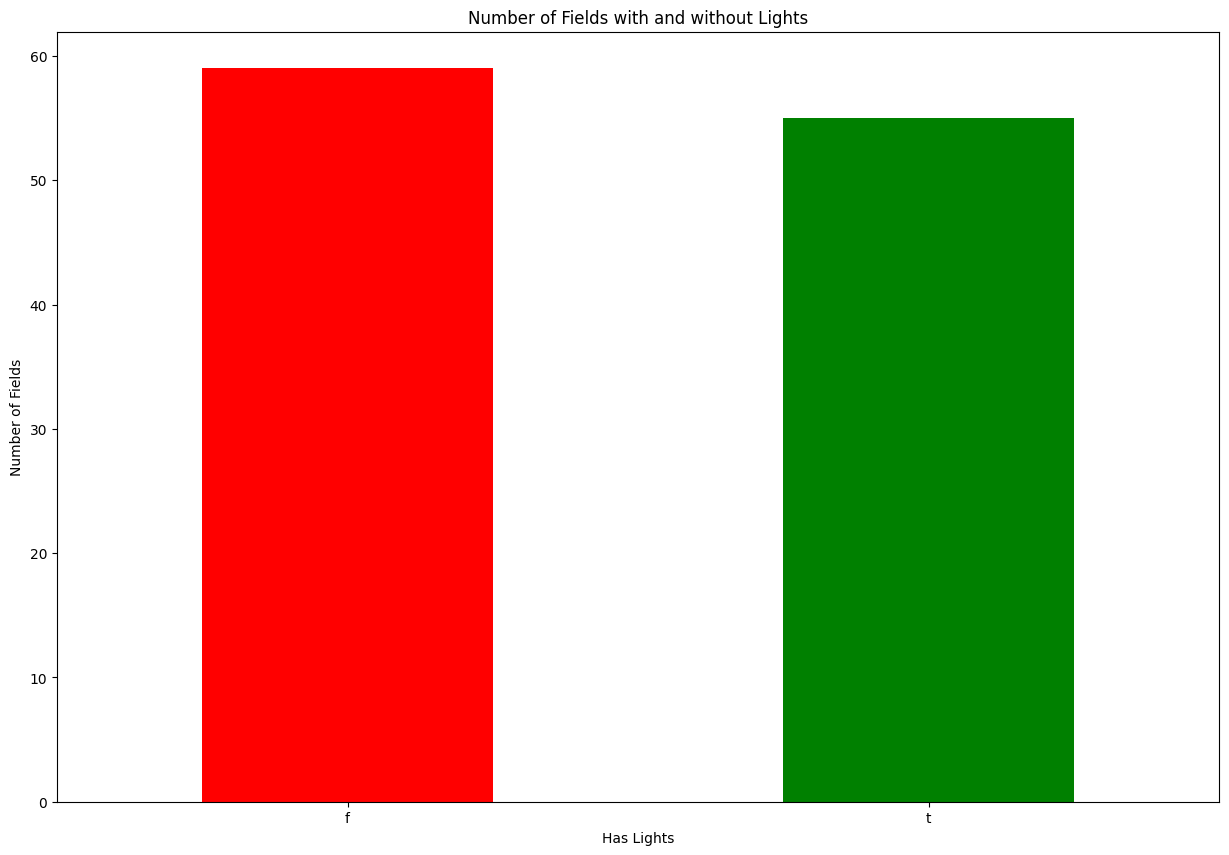

In [5]:
lights_counts = df['has_lights'].value_counts()
plt.figure(figsize=(15, 10))
lights_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel("Has Lights")
plt.ylabel("Number of Fields")
plt.xticks(rotation=0)
plt.title("Number of Fields with and without Lights")

This bar graph shows how many fields have lights versus how many don’t. The results are pretty evenly split between the two.

In [18]:
fields_count = df["neighborhood"].value_counts().reset_index()
fields_count.columns = ['neighborhood', 'fields_count']

lights_counts = df.groupby('neighborhood')['has_lights'].apply(lambda x: x.map({'t': 1, 'f': 0}).sum()).reset_index()
lights_counts.columns = ['neighborhood', 'fields_with_lights']

merged_df = pd.merge(fields_count, lights_counts, on='neighborhood', how='left')

merged_df['fields_with_lights'] = merged_df['fields_with_lights'].fillna(0).astype(int)

merged_df

,neighborhood,fields_count,fields_with_lights
0,Brighton Heights,7,0
1,South Side Slopes,6,4
2,Brookline,6,3
3,Squirrel Hill South,5,2
4,Carrick,5,3
5,Lower Lawrenceville,4,2
6,Mount Washington,4,4
7,Hazelwood,4,1
8,Highland Park,4,0
9,Sheraden,3,1


This dataframe shows the number of fields in each neighborhood, along with how many of those fields have lights.

In [19]:
merged_df['sum_of_fields'] = merged_df['fields_count'] + merged_df['fields_with_lights']

merged_df.drop(['fields_count', 'fields_with_lights'], axis=1, inplace=True)

sorted_df = merged_df.sort_values(by='sum_of_fields', ascending=False)

sorted_df


,neighborhood,sum_of_fields
1,South Side Slopes,10
2,Brookline,9
4,Carrick,8
6,Mount Washington,8
0,Brighton Heights,7
3,Squirrel Hill South,7
12,Morningside,6
11,Troy Hill,6
5,Lower Lawrenceville,6
7,Hazelwood,5


This dataframe calculates a score by giving 1 point for each field and an additional point if the field has lights. It sums these to create a total value for each neighborhood.

In [ ]:
neighborhoods = geopandas.read_file("Data/Neighborhoods_.shp")

In [21]:
merged_geo_df = pd.merge(neighborhoods, sorted_df, left_on='hood', right_on='neighborhood', how='left')

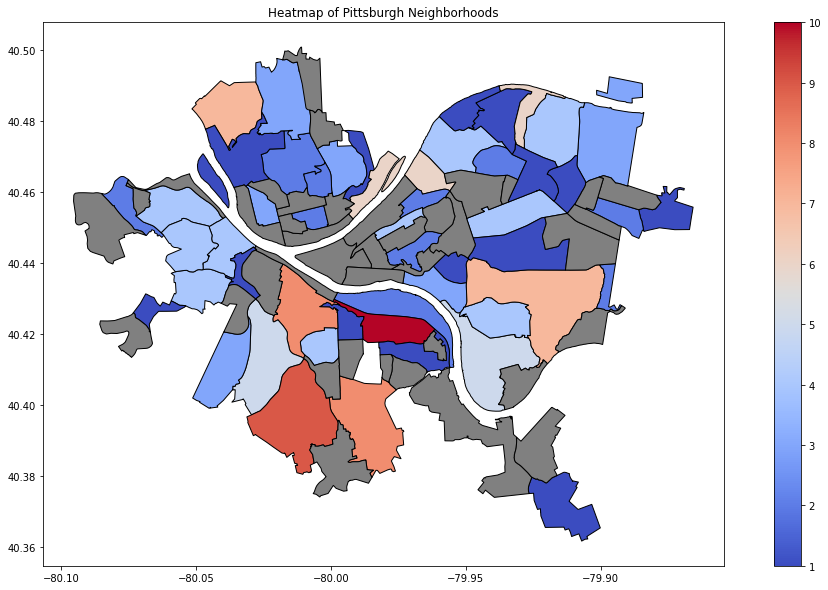

In [22]:
fig, ax = plt.subplots(figsize=(18, 10))
merged_geo_df.plot(column='sum_of_fields', cmap='coolwarm', linewidth=1, ax=ax, edgecolor='black', legend=True, missing_kwds={"color":"grey"})
plt.title('Heatmap of Pittsburgh Neighborhoods')

plt.show()

This heatmap uses color to represent the sum values. Neighborhoods with higher scores appear more red, while those with lower scores are more blue. Gray areas indicate neighborhoods with no field data available.

In [23]:
sorted_df.head(10)

,neighborhood,sum_of_fields
1,South Side Slopes,10
2,Brookline,9
4,Carrick,8
6,Mount Washington,8
0,Brighton Heights,7
3,Squirrel Hill South,7
12,Morningside,6
11,Troy Hill,6
5,Lower Lawrenceville,6
7,Hazelwood,5


This shows the top ten neighborhoods based on the heatmap data. In conclusion, South Side Slopes ranks as the best neighborhood for baseball fields.

# Personal Conclusion

My personal favorite is West Oakland. As a Pitt student, I’ve had a great experience living here since August. While it didn’t rank high in the data based on baseball fields, that doesn’t impact my preference because I don’t play baseball anyway. This project has made me realize I should get out and explore more neighborhoods outside of Oakland.